# Introduction to JAX ♥ 👨‍💻 🚀
<br>

![](https://user-images.githubusercontent.com/41967348/140406260-96e6a1fe-9285-4328-8343-25895f84480c.png)

<br>

**Author**: [Sayan Nath](https://twitter.com/sayannath2350)

## Imports

In [1]:
import numpy as np
import jax.numpy as jnp

# Import transform functions
from jax import grad, jit, vmap, pmap

from jax import lax # lax is a low level api of JAX
from jax import make_jaxpr
from jax import random 
from jax import device_put

import matplotlib.pyplot as plt

## Operation 1

> `JAX` follow similar syntax like numpy

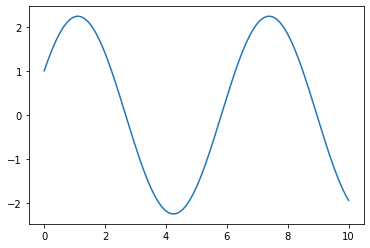

In [2]:
# Numpy operation
X = np.linspace(0, 10, 1000)
y = 2 * np.sin(X) + np.cos(X)
plt.plot(X, y)

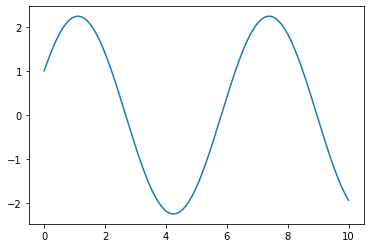

In [3]:
# JAX operation
X = jnp.linspace(0, 10, 1000)
y = 2 * jnp.sin(X) + jnp.cos(X)
plt.plot(X, y)

## Operation 2

> `JAX` arrays are immutable whereas numpy arrays are.

In [4]:
# Numpy operation

size=10
index=2
value=12

X = np.arange(size)
print(X)
X[index] = value
print(X)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1 12  3  4  5  6  7  8  9]


In [5]:
# JAX operation

X = jnp.arange(size) # size=10
print(X)
y = X.at[index].set(value) # index=2 and value=12
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1 12  3  4  5  6  7  8  9]


## Operation 3

> `JAX` handles random numbers differently. It is not stateful.

In [6]:
SEEDS=42
key = random.PRNGKey(SEEDS)

X = random.normal(key, (5,))

print('The type of X is {}.'.format(type(X)))
print(X)

The type of X is <class 'jaxlib.xla_extension.DeviceArray'>.
[ 0.6122652  1.1225883 -0.8544134 -0.8127325 -0.890405 ]


## Operation 4

> `JAX` is accelerator agnostic. Bonus point is you dont have to write different code to make it run in `GPU/TPU`

In [7]:
# Initialising the size
size=10000

# Generating 10000x10000 DeviceArray
X_jnp = random.normal(key, (size, size), dtype=jnp.float32) # key = random.PRNGKey(SEEDS)

# Generating 10000x10000 NumpyArray
X_np = np.random.normal((size, size)).astype(np.float32)

%timeit jnp.dot(X_jnp, X_jnp.T).block_until_ready() # GPU operation
%timeit np.dot(X_np, X_np.T) # CPU operation

The slowest run took 4.25 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 846 ms per loop
The slowest run took 122.27 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.4 µs per loop


In [10]:
# Put NumpyArray into GPU
X_np_gpu = device_put(X_np)

%timeit jnp.dot(X_jnp, X_jnp.T).block_until_ready() # Pure JAX operation
%timeit jnp.dot(X_np_gpu, X_np_gpu.T).block_until_ready() # Numpy --> JAX

1 loop, best of 5: 879 ms per loop
The slowest run took 5.88 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 147 µs per loop


`.block_until_ready()` is using asynchronous dispatch in the background.

# Thank You